In [ ]:
#!pip install vaderSentiment
#!pip install -U sentence-transformers

In [2]:
# Import Libraries
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
from sentence_transformers import SentenceTransformer
from tqdm import tqdm

# Sentiment Score & Basic cleaning

In [3]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# input sample
text = "I absolutely love this video! It's so inspiring and well-made :)"

# get score
scores = analyzer.polarity_scores(text)

# output score
print("Text:", text)
print("VADER Scores:", scores)

# classify by compound 
compound = scores['compound']
if compound >= 0.05:
    sentiment = "Positive 😊"
elif compound <= -0.05:
    sentiment = "Negative 😠"
else:
    sentiment = "Neutral 😐"

print("Overall Sentiment:", sentiment)

Text: I absolutely love this video! It's so inspiring and well-made :)
VADER Scores: {'neg': 0.0, 'neu': 0.412, 'pos': 0.588, 'compound': 0.9081}
Overall Sentiment: Positive 😊


In [4]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# read CSV
df = pd.read_csv("CAvideos.csv")

# initialize Vader
analyzer = SentimentIntensityAnalyzer()

# add new cols
df['title_compound'] = 0.0
df['description_compound'] = 0.0

for i in range(len(df)):
    # Title 
    title = str(df.loc[i, 'title'])
    title_score = analyzer.polarity_scores(title)
    df.loc[i, 'title_compound'] = title_score['compound']

    # Description 
    description = str(df.loc[i, 'description'])
    desc_score = analyzer.polarity_scores(description)
    df.loc[i, 'description_compound'] = desc_score['compound']

# tags str to list
df['tags'] = df['tags'].astype(str).apply(lambda x: x.split('|'))

df[['title', 'title_compound', 'description_compound', 'tags']].head()

,title,title_compound,description_compound,tags
0,Eminem - Walk On Water (Audio) ft. Beyoncé,0.0000,0.6369,"[Eminem, ""Walk"", ""On"", ""Water"", ""Aftermath/Sha..."
1,PLUSH - Bad Unboxing Fan Mail,-0.2960,0.7783,"[plush, ""bad unboxing"", ""unboxing"", ""fan mail""..."
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",-0.6124,0.7365,"[racist superman, ""rudy"", ""mancuso"", ""king"", ""..."
3,I Dare You: GOING BALD!?,0.0000,0.9290,"[ryan, ""higa"", ""higatv"", ""nigahiga"", ""i dare y..."
4,Ed Sheeran - Perfect (Official Music Video),0.5719,0.4404,"[edsheeran, ""ed sheeran"", ""acoustic"", ""live"", ..."


In [5]:
pd.set_option("display.max_colwidth", 100)  # 让输出的文本完整显示

# Top 10 positive title sentiment
print("\n🔷 Top 10 Positive Title Sentiments:")
top_titles = df.sort_values(by="title_compound", ascending=False)[["title", "title_compound"]].head(10)
print(top_titles)

# Bottom 10 negative title sentiment
print("\n🔻 Bottom 10 Negative Title Sentiments:")
bottom_titles = df.sort_values(by="title_compound", ascending=True)[["title", "title_compound"]].head(10)
print(bottom_titles)

# Top 10 positive description sentiment
print("\n🔷 Top 10 Positive Description Sentiments:")
top_descriptions = df.sort_values(by="description_compound", ascending=False)[["description", "description_compound"]].head(10)
print(top_descriptions)

# Bottom 10 negative description sentiment
print("\n🔻 Bottom 10 Negative Description Sentiments:")
bottom_descriptions = df.sort_values(by="description_compound", ascending=True)[["description", "description_compound"]].head(10)
print(bottom_descriptions)



🔷 Top 10 Positive Title Sentiments:
                                                                                                     title  \
7487             Best Old English Love Songs♥♥♥♥Love Songs 80's 90's Collection♥♥♥♥Greatest Old Love Songs   
7701             Best Old English Love Songs♥♥♥♥Love Songs 80's 90's Collection♥♥♥♥Greatest Old Love Songs   
9984        Best Old English Love Songs♥♥♥♥Love Songs 80's 90's Collection♥♥♥♥Greatest Old Love Songs 2017   
9637        Best Old English Love Songs♥♥♥♥Love Songs 80's 90's Collection♥♥♥♥Greatest Old Love Songs 2017   
9402        Best Old English Love Songs♥♥♥♥Love Songs 80's 90's Collection♥♥♥♥Greatest Old Love Songs 2017   
9210             Best Old English Love Songs♥♥♥♥Love Songs 80's 90's Collection♥♥♥♥Greatest Old Love Songs   
8999             Best Old English Love Songs♥♥♥♥Love Songs 80's 90's Collection♥♥♥♥Greatest Old Love Songs   
8673             Best Old English Love Songs♥♥♥♥Love Songs 80's 90's Collection♥♥♥♥

In [6]:
# save to new CSV file
df.to_csv("CAVideos_with_vader.csv", index=False)

In [7]:
df = pd.read_csv("CAVideos_with_vader.csv")

In [8]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,title_compound,description_compound
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10.0,2017-11-10T17:00:03.000Z,"['Eminem', '""Walk""', '""On""', '""Water""', '""Aftermath/Shady/Interscope""', '""Rap""']",17158579.0,787425.0,43420.0,125882.0,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé is available everywhere: http://shady.sr/WOWEminem ...,0.0000,0.6369
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23.0,2017-11-13T17:00:00.000Z,"['plush', '""bad unboxing""', '""unboxing""', '""fan mail""', '""idubbbztv""', '""idubbbztv2""', '""things""...",1014651.0,127794.0,1688.0,13030.0,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,"STill got a lot of packages. Probably will last for another year. On a side note, more 2nd chann...",-0.2960,0.7783
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Lele Pons",Rudy Mancuso,23.0,2017-11-12T19:05:24.000Z,"['racist superman', '""rudy""', '""mancuso""', '""king""', '""bach""', '""racist""', '""superman""', '""love""...",3191434.0,146035.0,5339.0,8181.0,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► https://www.youtube.com/channel/UC5jkXpfnBhlDjqh0ir5Fs...,-0.6124,0.7365
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24.0,2017-11-12T18:01:41.000Z,"['ryan', '""higa""', '""higatv""', '""nigahiga""', '""i dare you""', '""idy""', '""rhpc""', '""dares""', '""no ...",2095828.0,132239.0,1989.0,17518.0,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,"I know it's been a while since we did this show, but we're back with what might be the best epis...",0.0000,0.9290
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10.0,2017-11-09T11:04:14.000Z,"['edsheeran', '""ed sheeran""', '""acoustic""', '""live""', '""cover""', '""official""', '""remix""', '""offi...",33523622.0,1634130.0,21082.0,85067.0,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlanti.cr/yt-album\nSubscribe to Ed's channel: http://b...,0.5719,0.4404


## Add category

In [10]:
import json
import pandas as pd

# read category JSON file
with open("CA_category_id.json", "r") as f:
    category_json = json.load(f)

# ✅ Step 1: create mapping first
category_mapping = {
    item["id"]: item["snippet"]["title"]
    for item in category_json["items"]
}

# ✅ Step 2: make sure category_id is a string
df["category_id"] = df["category_id"].apply(lambda x: str(int(x)) if pd.notna(x) else None)

# ✅ Step 3: drop old category column if exists
if "category" in df.columns:
    df.drop(columns=["category"], inplace=True)

# ✅ Step 4: map to category name
df["category"] = df["category_id"].map(category_mapping)

# print result
print(df[["category_id", "category"]].dropna().head(10))


  category_id         category
0          10            Music
1          23           Comedy
2          23           Comedy
3          24    Entertainment
4          10            Music
5          25  News & Politics
6          23           Comedy
7          22   People & Blogs
8          24    Entertainment
9          22   People & Blogs


# Data exploration

/tmp/ipykernel_6056/3349198362.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=author_counts.values, y=author_counts.index, palette="viridis")


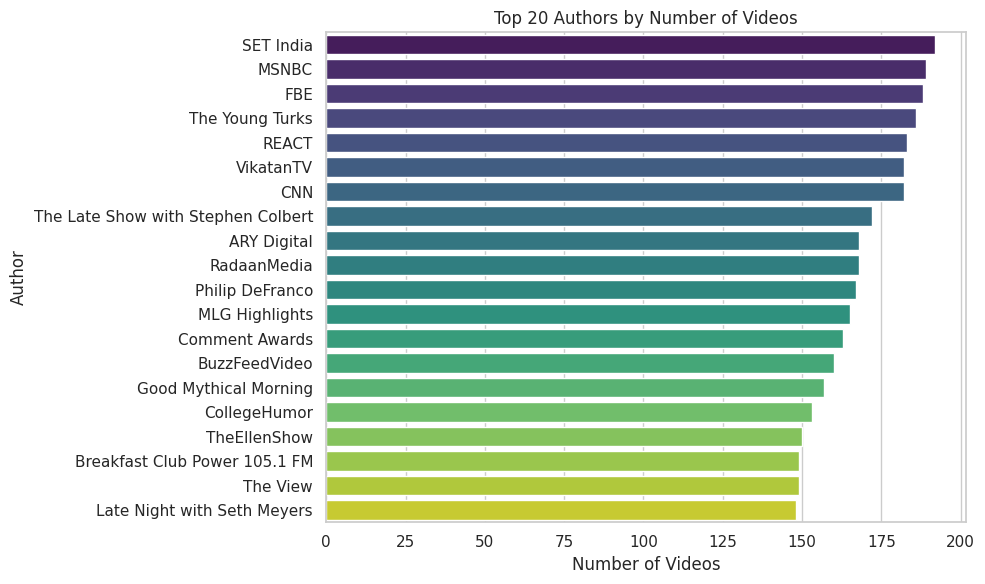

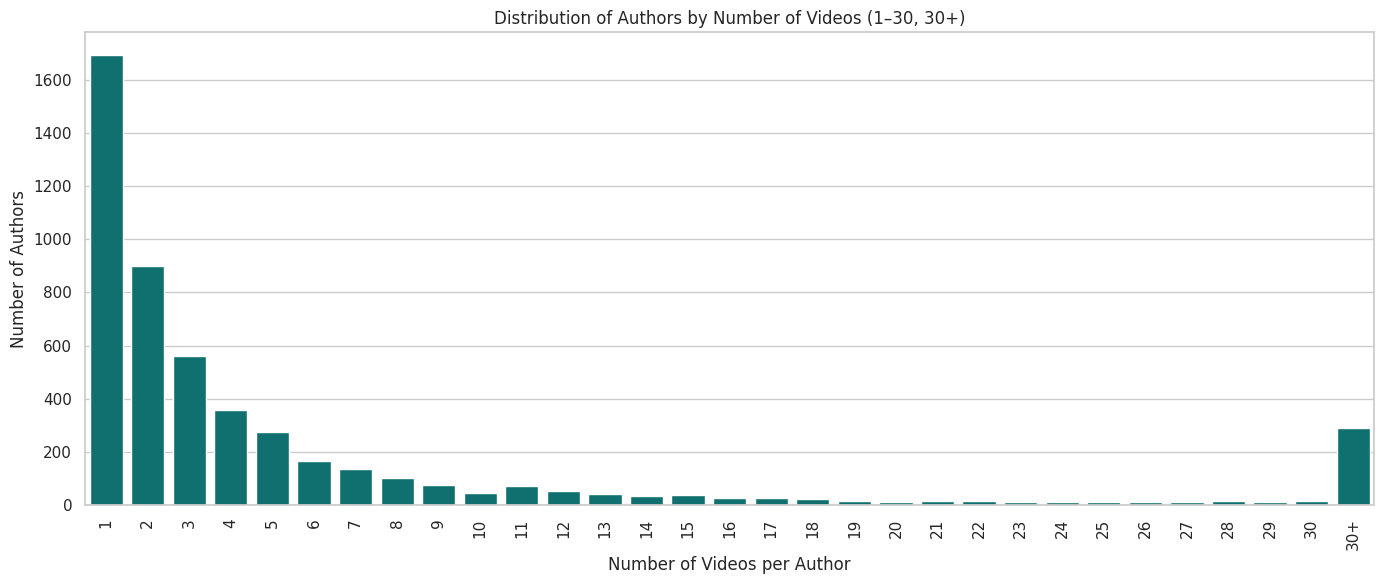

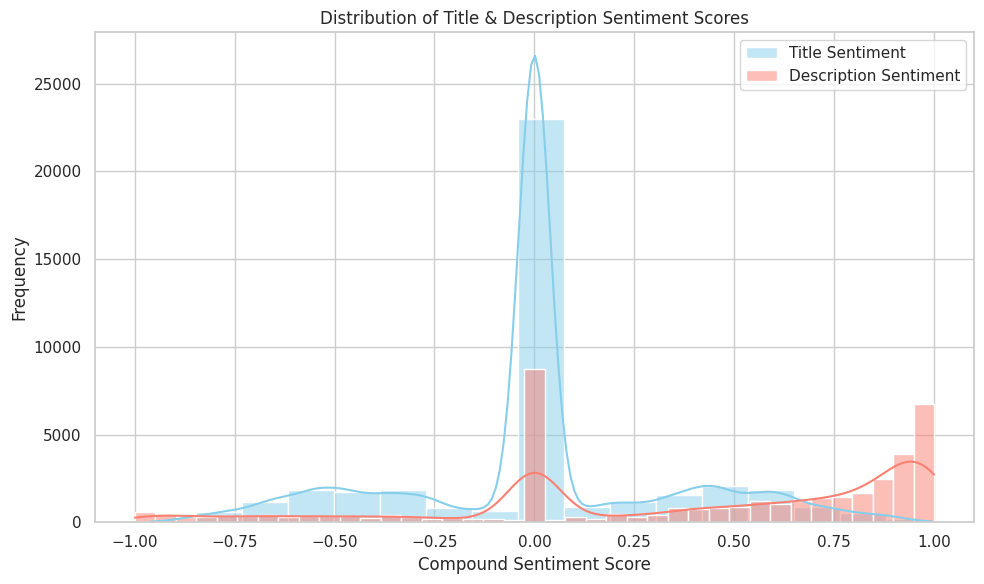

/tmp/ipykernel_6056/3349198362.py:60: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  title_avg = df_valid.groupby("title_bin")["like_ratio"].mean()
/tmp/ipykernel_6056/3349198362.py:61: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  desc_avg = df_valid.groupby("desc_bin")["like_ratio"].mean()


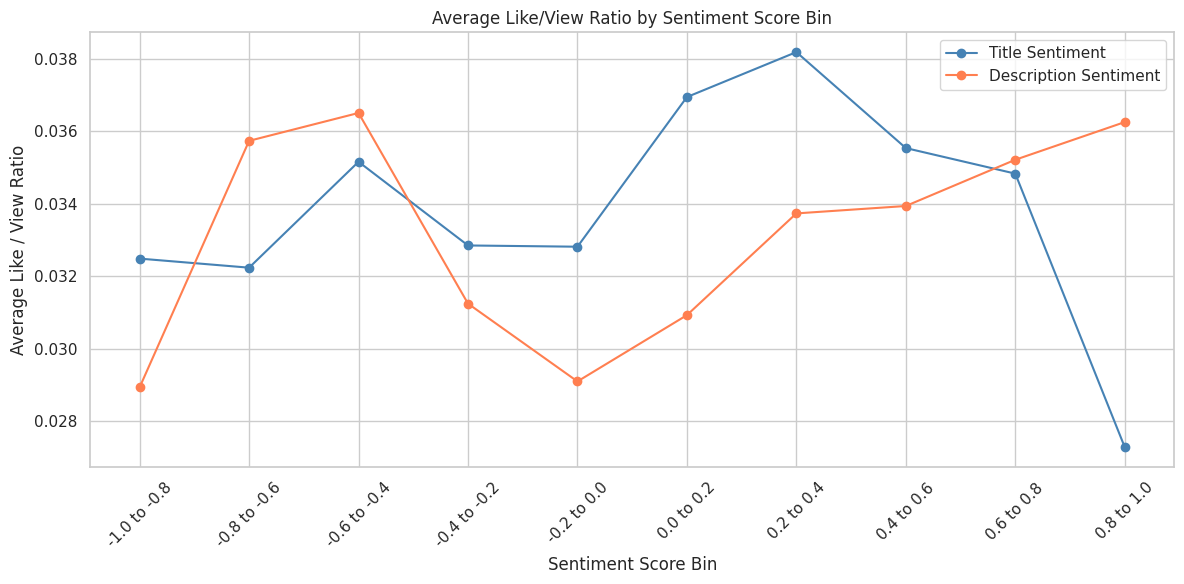

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# === Chart 1: Top 20 authors by video count ===
plt.figure()
author_counts = df["channel_title"].value_counts().head(20)
sns.barplot(x=author_counts.values, y=author_counts.index, palette="viridis")
plt.title("Top 20 Authors by Number of Videos")
plt.xlabel("Number of Videos")
plt.ylabel("Author")
plt.tight_layout()
plt.show()

# === Chart 1: Distribution of authors by number of videos ===
author_freq = df["channel_title"].value_counts()

author_freq_binned = author_freq.apply(lambda x: str(x) if x <= 30 else "30+")

bucket_counts = author_freq_binned.value_counts()

sorted_keys = [str(i) for i in range(1, 31)] + ["30+"]
bucket_counts = bucket_counts.reindex(sorted_keys).fillna(0)

plt.figure(figsize=(14, 6))
sns.barplot(x=bucket_counts.index, y=bucket_counts.values, color="teal")
plt.title("Distribution of Authors by Number of Videos (1–30, 30+)")
plt.xlabel("Number of Videos per Author")
plt.ylabel("Number of Authors")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# === Chart 2: Sentiment distribution of title and description ===
plt.figure()
sns.histplot(df["title_compound"].dropna(), color="skyblue", label="Title Sentiment", kde=True)
sns.histplot(df["description_compound"].dropna(), color="salmon", label="Description Sentiment", kde=True)
plt.title("Distribution of Title & Description Sentiment Scores")
plt.xlabel("Compound Sentiment Score")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

# === Chart 3: Sentiment vs Like/View Ratio ===

df_valid = df[(df["likes"] > 0) & (df["views"] > 0)].copy()
df_valid["like_ratio"] = df_valid["likes"] / df_valid["views"]

# bins：10
bins = [-1 + i*0.2 for i in range(11)]
labels = [f"{round(bins[i],2)} to {round(bins[i+1],2)}" for i in range(len(bins)-1)]

df_valid["title_bin"] = pd.cut(df_valid["title_compound"], bins=bins, labels=labels, include_lowest=True)
df_valid["desc_bin"] = pd.cut(df_valid["description_compound"], bins=bins, labels=labels, include_lowest=True)

title_avg = df_valid.groupby("title_bin")["like_ratio"].mean()
desc_avg = df_valid.groupby("desc_bin")["like_ratio"].mean()

plt.figure(figsize=(12, 6))
plt.plot(title_avg.index, title_avg.values, marker='o', label="Title Sentiment", color="steelblue")
plt.plot(desc_avg.index, desc_avg.values, marker='o', label="Description Sentiment", color="coral")
plt.title("Average Like/View Ratio by Sentiment Score Bin")
plt.xlabel("Sentiment Score Bin")
plt.ylabel("Average Like / View Ratio")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()





We found that videos with neutral titles and descriptions are the most common, but they tend to have a lower likes-to-views ratio. In contrast, videos with relatively positive or negative tones receive more likes per view on average.

# Count Tags

In [12]:
import ast

# make sure dara type is correct
df["tags"] = df["tags"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith("[") else [])


In [13]:
from collections import Counter

all_tags = [tag for tags in df["tags"] if isinstance(tags, list) for tag in tags]
tag_counts = Counter(all_tags)

tag_count_df = pd.DataFrame(tag_counts.items(), columns=["tag", "count"]).sort_values(by="count", ascending=False)
print(tag_count_df.head(10))


             tag  count
51       "funny"   3383
825       [none]   2385
50      "comedy"   2378
729       "news"   1343
8381      "2018"   1106
473      "video"   1025
733   "politics"   1005
328      "humor"    959
374     "review"    907
532       "food"    899


# Predictive Models

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# have data ready
df = df.copy()
df = df.dropna(subset=["likes", "title_compound", "description_compound", "category_id"])

# encode lables: category
le = LabelEncoder()
df["category_encoded"] = le.fit_transform(df["category"].astype(str))

# choose features
feature_cols = ["title_compound", "description_compound", "category_encoded", "views", "comment_count"]
X = df[feature_cols]
y = df["likes"]

# split training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train XGBoost model
model = XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=6, random_state=42)
model.fit(X_train, y_train)

# predict and evaluate
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"✅ RMSE: {rmse:.2f}")
print(f"✅ R² Score: {r2:.4f}")


✅ RMSE: 29982.79
✅ R² Score: 0.9541



🔍 Feature Importance (by gain):
                feature    importance
4         comment_count  6.140978e+11
3                 views  1.407411e+11
0        title_compound  4.523223e+10
2      category_encoded  4.350926e+10
1  description_compound  3.276089e+10


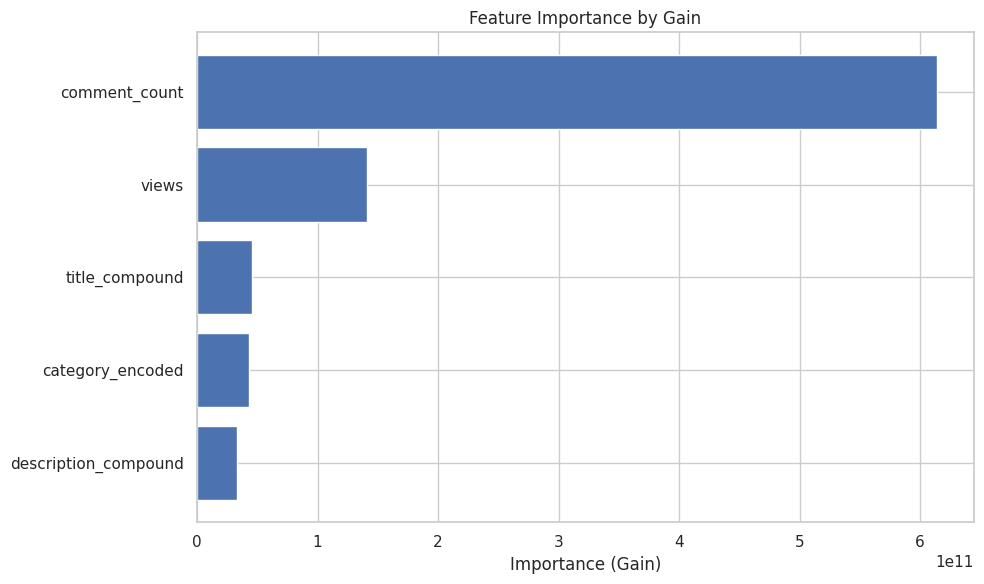

In [27]:
# feature importance
importances = model.get_booster().get_score(importance_type='gain')

importance_df = pd.DataFrame({
    "feature": list(importances.keys()),
    "importance": list(importances.values())
}).sort_values(by="importance", ascending=False)

print("\n🔍 Feature Importance (by gain):")
print(importance_df)

# plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df["feature"], importance_df["importance"])
plt.xlabel("Importance (Gain)")
plt.title("Feature Importance by Gain")
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()


In [23]:
results = pd.DataFrame({
    "actual_likes": y_test.values,
    "predicted_likes": y_pred
})
print(results.head(10))


   actual_likes  predicted_likes
0         263.0       902.254517
1        8762.0     15211.264648
2       27026.0     10808.913086
3         104.0        20.690470
4       50894.0     41949.988281
5      132609.0     94608.835938
6         936.0      1518.157104
7         256.0      6726.638672
8       52232.0     33002.093750
9        4212.0      4990.466797


# Predict category

In [17]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# input：title + description + tags
df["tags_str"] = df["tags"].apply(lambda x: " ".join(x) if isinstance(x, list) else "")
df["text"] = df["title"].fillna("") + " " + df["description"].fillna("") + " " + df["tags_str"]

# make sure category_id is ok
df = df[df["category_id"].notna()]
df["category_id"] = df["category_id"].astype(int)

# make sure LabelEncoder is 0-N label
le = LabelEncoder()
df["label"] = le.fit_transform(df["category_id"])



In [18]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from datasets import Dataset
import numpy as np

# model
model_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# convert to HF dataset
dataset = Dataset.from_pandas(df[["text", "label"]])
dataset = dataset.train_test_split(test_size=0.2)

# Tokenize
def tokenize(example):
    return tokenizer(example["text"], truncation=True, padding="max_length")

dataset = dataset.map(tokenize, batched=True)


Map:   0%|          | 0/32649 [00:00<?, ? examples/s]

Map:   0%|          | 0/8163 [00:00<?, ? examples/s]

In [75]:
from sklearn.metrics import classification_report, confusion_matrix

# get real labels
true_labels = dataset["test"]["label"]

# predict labels
pred_labels = np.argmax(preds.predictions, axis=1)

# convert to category_id
true_category_ids = le.inverse_transform(true_labels)
pred_category_ids = le.inverse_transform(pred_labels)

# show some result
print("\n🔍 Prediction Preview:")
for t, p in zip(true_category_ids[:10], pred_category_ids[:10]):
    print(f"Actual: {t}, Predicted: {p}")



🔍 Prediction Preview:
Actual: 22, Predicted: 22
Actual: 26, Predicted: 26
Actual: 24, Predicted: 24
Actual: 29, Predicted: 29
Actual: 24, Predicted: 24
Actual: 24, Predicted: 24
Actual: 17, Predicted: 17
Actual: 10, Predicted: 10
Actual: 23, Predicted: 23
Actual: 22, Predicted: 22


In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=len(le.classes_)
)

training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    logging_dir="./logs",
    save_strategy="no"
)

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)
    acc = (preds == labels).mean()
    return {"accuracy": acc}

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset["train"],
    eval_dataset=dataset["test"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

trainer.train()


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/transformers/training_args.py:1594: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/tmp/ipykernel_7300/3600839128.py:22: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy
1,0.519600,0.523116,0.859733
2,0.298600,0.412707,0.906897
3,0.138000,0.401647,0.925885


TrainOutput(global_step=12246, training_loss=0.4213979743809243, metrics={'train_runtime': 2284.2835, 'train_samples_per_second': 42.879, 'train_steps_per_second': 5.361, 'total_flos': 1.2978255099036672e+16, 'train_loss': 0.4213979743809243, 'epoch': 3.0})

In [74]:
model.save_pretrained("./category_model")
tokenizer.save_pretrained("./category_model")
import joblib

# save label encoder
joblib.dump(le, "./category_model/label_encoder.pkl")


['./category_model/label_encoder.pkl']

In [20]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import joblib

# load + tokenizer
model = AutoModelForSequenceClassification.from_pretrained("./category_model")
tokenizer = AutoTokenizer.from_pretrained("./category_model")

# load label encoder
le = joblib.load("./category_model/label_encoder.pkl")
